<a href="https://colab.research.google.com/github/jirayuwat12/SuperAI/blob/master/NeuralNetworkAndDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Percepton with TF

In [ ]:
import tensorflow as tf

In [ ]:
d_in = (2,)

In [ ]:
model = tf.keras.Sequential()

In [ ]:
# dense connect every node = FC = fully connected
model.add(tf.keras.layers.Dense(1,input_shape=d_in))
model.add(tf.keras.layers.Activation('sigmoid'))

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1))

**Mean Square Error : MSE**
$$
E(W) = \dfrac{1}{N}\sum (o_i^{true} - o_i^{predict})^2
$$

**Stochastic Gradient Descent : SGD**
- use less memory than GD

In [ ]:
X = [[0,0],[0,1],[1,0],[1,1]]
y = [0,1,1,0]

In [ ]:
history = model.fit(X,y,epochs=500)

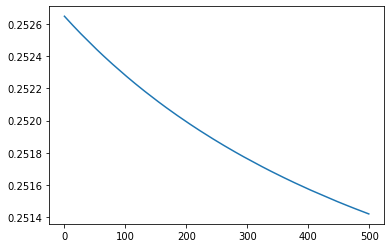

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

In [ ]:
Z = model.predict(X)
print(tf.round(Z))

1/1 [==============================] - 0s 156ms/step
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [1.]], shape=(4, 1), dtype=float32)


actual ans = 0,1,1,0

because this is a **non-linear**

# Multi-layer Perceptron : MLP

- add *hidden layers* between input and output linear

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(20,input_shape=d_in))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate = 1.5))

In [ ]:
X = [[0,0],[0,1],[1,0],[1,1]]
y = [0,1,1,0]

In [ ]:
history = model.fit(X,y,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 11ms/step - loss: 0.2224
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2219
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2214
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2209
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2203
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2198
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2192
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 0.2187
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 0.2181
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2176
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 0.2170
Epoch 12/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2164
Epoch 13/500
1/1 [==============================] - 0s 

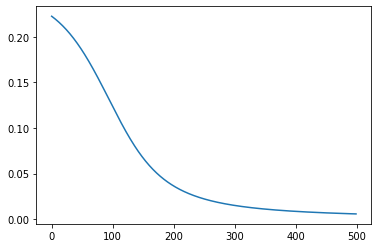

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

In [ ]:
Z = model.predict(X)
print(tf.round(Z))
# about 1,000 epoch

1/1 [==============================] - 0s 25ms/step
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


# activation function

1. Linear

    `tf.keras.activations.linear(x)`
1. Sigmoid 
    `tf.keras.activations.sigmoid(x)`
1. Hard Sigmoid
    
    3 line connected like sigmoid
1. tanh

    -1 to 1 but like sigmoid
1. ReLU

    x < 0, f(x) = 0

    other, f(x) = x

1. ELU

    like ReLU but no corner more curve

1. Softmax

    approximate the probability

    mostly last layer

# Tensor Operations

## tensor creations
- constant : `tf.constant([1,2,3])`
- variable : `tf.Variable([1,2,3])`
- from numpy : `tf.constant(np.array([1,2,3]))`
- to numpy : `A.numpy()`


## Automatic Differentiation

- gradient tapes
    ```python
    x = tf.Variable(3.0,name = 'x')
    with tf.GradientTape() as t:
        #t.watch(x) if x is constant (tf.constant(...))
        y = x**2 + 2*x + 1
    # dy_dx = 2x + 2
    dy_dx = t.gradient(y,x)
    #or
    t.watched_variables()
    print(dy_dx)
    ```

# non-linear regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import random

In [ ]:
N = 100
X = np.random.rand(N)
Y = np.sin(6 * X) + 0.2 + np.random.rand(N)

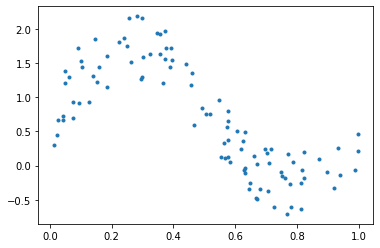

In [ ]:
plt.plot(X,Y,'.')

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256,input_shape=(1,),activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))

model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam',loss= tf.keras.losses.MeanSquaredError())

In [ ]:
history = model.fit(X,Y,epochs = 100)

4/4 [==============================] - 0s 3ms/step


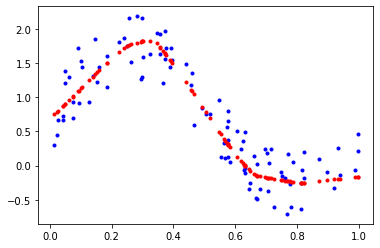

In [ ]:
plt.plot(X,Y,'.b')
plt.plot(X,model.predict(X),'.r')

# Deep learning

## MNIST with MLP

In [1]:

import tensorflow as tf

(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [5]:
# 1-hot encoder
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [6]:
d_in = (784,)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200,activation='relu',input_shape=d_in))
# model.add(tf.keras.layers.Dense(200,activation='relu'))
model.add(tf.keras.layers.Dense(200,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(loss = 'mse',
              optimizer = 'sgd')


In [ ]:
model.fit(X_train/255.,y_train,epochs=100,validation_data=(X_test/255.,y_test))

In [11]:
pred = model.predict(X_test/255.)
print(np.sum(pred.argmax(axis=1) == y_test.argmax(axis=1)) / len(y_test))

313/313 [==============================] - 1s 3ms/step
0.9488


In [12]:
pred[0]

array([3.5354294e-04, 2.1551062e-07, 1.0469919e-03, 6.3512204e-03,
       2.0750188e-06, 2.2980414e-04, 1.2482332e-07, 9.9174249e-01,
       4.4149419e-05, 2.2945333e-04], dtype=float32)

# 2D Discrete Cross-coerrelation


- Original purpose = Measure of similarity of 2 signals
- Image processing - Filtering
- sliding dot product
$$
g_{i,j} = \sum_{u = -k}^k \sum_{v = -k}^k h_{u,v}f_{i+u,j+v}
$$

**aka Convolutional NN ( CNN )**